<a href="https://colab.research.google.com/github/BijoyetaK/deep-learning-challeng/blob/main/Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.2 MB/s eta 0:00:00


## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(columns=['EIN','NAME'])

In [4]:
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
column_names = application_df.columns
application_df[column_names].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Generate our categorical variable lists
categories_list = application_df.dtypes[application_df.dtypes=="object"].index.tolist()
print(categories_list)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


In [7]:
# Check the number of unique values in each column
application_df[categories_list].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_type_cnt = application_df['APPLICATION_TYPE'].value_counts().reset_index()
app_type_cnt

,index,APPLICATION_TYPE
0,T3,27037
1,T4,1542
2,T6,1216
3,T5,1173
4,T19,1065
5,T8,737
6,T7,725
7,T10,528
8,T9,156
9,T13,66


In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

application_types_to_replace = []
application_types_to_replace = app_type_cnt[app_type_cnt['APPLICATION_TYPE'] <= 156]['index']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
apptype_bin_df = application_df['APPLICATION_TYPE'].value_counts()
apptype_bin_df

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_val_cnt = application_df['CLASSIFICATION'].value_counts().reset_index()
classification_val_cnt

,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
...,...,...
66,C4120,1
67,C8210,1
68,C2561,1
69,C4500,1


In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_count_filtered = classification_val_cnt[classification_val_cnt['CLASSIFICATION'] > 1]
class_count_filtered



,index,CLASSIFICATION
0,C1000,17326
1,C2000,6074
2,C1200,4837
3,C3000,1918
4,C2100,1883
5,C7000,777
6,C1700,287
7,C4000,194
8,C5000,116
9,C1270,114


In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = []
classifications_to_replace = classification_val_cnt[classification_val_cnt['CLASSIFICATION'] < 1883]['index']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [13]:
application_df.head(50)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
cat_to_num_df = pd.get_dummies(application_df)
cat_to_num_df.head(20)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,1,5000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,31452,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,1,7508025,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,1,94389,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = cat_to_num_df['IS_SUCCESSFUL'].values
X = cat_to_num_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


<ipython-input-15-050ab3eb182e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = cat_to_num_df.drop(['IS_SUCCESSFUL'],1).values


In [16]:
cat_to_num_df.columns


Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [17]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Using Keras tuner
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [19]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [20]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 28s]
val_accuracy: 0.7245481014251709

Best val_accuracy So Far: 0.7274635434150696
Total elapsed time: 00h 12m 56s


In [21]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 2,
 'units_0': 3,
 'units_1': 9,
 'units_2': 7,
 'units_3': 9,
 'units_4': 9,
 'units_5': 3,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [22]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5584 - accuracy: 0.7275 - 372ms/epoch - 1ms/step
Loss: 0.5584121942520142, Accuracy: 0.7274635434150696


## Compile, Train and Evaluate the Model

In [23]:
#Second medthod
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1= 120
hidden_nodes_layer2 = 85

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="LeakyReLU"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,activation="ReLU"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 120)               5280      
                                                                 
 dense_5 (Dense)             (None, 85)                10285     
                                                                 
 dense_6 (Dense)             (None, 1)                 86        
                                                                 
Total params: 15,651
Trainable params: 15,651
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.7579 - accuracy: 0.6964
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.7028 - accuracy: 0.7126
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.7167
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.6532 - accuracy: 0.7177
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6310 - accuracy: 0.7259
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6322 - accuracy: 0.7206
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6201 - accuracy: 0.7174
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6278 - accuracy: 0.7235
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6200 - accuracy: 0.7281
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6039 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5668 - accuracy: 0.7244 - 318ms/epoch - 1ms/step
Loss: 0.5668252110481262, Accuracy: 0.7244315147399902


In [28]:
#Create a Dataframe with training history
history_df = pd.DataFrame(fit_model.history)

history_df.head()

,loss,accuracy
0,0.757928,0.696392
1,0.702780,0.712642
2,0.663535,0.716724
3,0.653240,0.717696
4,0.630954,0.725859


In [29]:
len(history_df)

100

In [30]:
#To match the number of epochs, increasing the index by 1
history_df.index += 1

<Axes: >

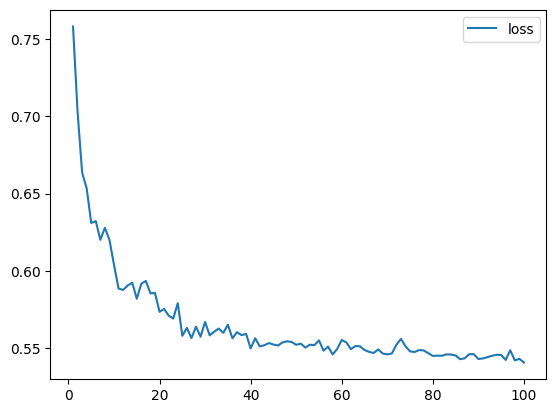

In [31]:
#Plotting the loss
history_df.plot(y="loss")

<Axes: >

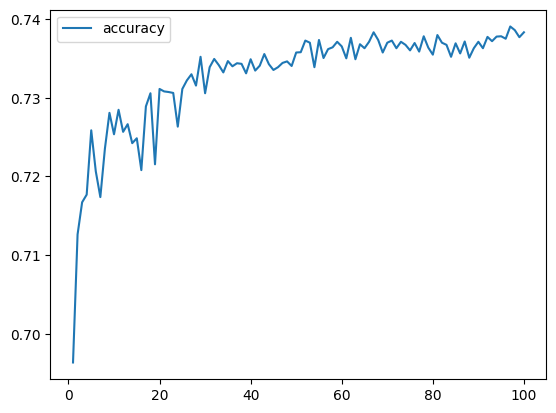

In [32]:
#Plotting the accuracy
history_df.plot(y="accuracy")

In [34]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
from google.colab import files

nn.save('AlphabetSoupcharity.hdf5')
files.download('AlphabetSoupcharity.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>